<a href="https://colab.research.google.com/github/Chenuli05/CustomerChurn/blob/main/Churn_ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
# !git clone https://github.com/Chenuli05/Customer_churn.git
# %cd Customer_churn

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 25) #to display all columns

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Telco-Customer-Churn.csv')

In [81]:
#size of the dataset(rows, columns)
df.shape

(7043, 21)

In [82]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
#to see the data type of each column
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [85]:
#summary of the numeric data cols

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [86]:
df.nunique()# number of unique values for each feature

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [87]:
# consistent naming of features
df = df.rename(columns={'gender':'Gender','tenure':'Tenure' })
df.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

In [88]:
df.isna().sum()

,0
customerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


No missing values found

In [89]:
df.loc[df.duplicated()]


,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


No duplicate rows

In [90]:
#no predictive value for customer ID - dropping column
df = df.drop(['customerID'], axis=1).copy() #dropping single column
df.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
df.shape #new df


(7043, 20)

converting total charges which is an object to a numeric value

In [92]:
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isna().sum()
df[df['TotalCharges'].isna()]


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


After converting to numerical values, we can see that there are null values in TotalCharges column. These columns must be dropped.

In [93]:
df = df.dropna()#drop all na values(which are in total charges column)
df.shape
df[df['TotalCharges'].isna()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [94]:
from sklearn.preprocessing import LabelEncoder
df_numeric = df.copy()
label = LabelEncoder()
for col in df_numeric.select_dtypes(include=['object']).columns:
  df_numeric[col] = label.fit_transform(df_numeric[col])

df = df_numeric
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [95]:
# cat_cols = df.select_dtypes(include='object').columns
# cat_cols

In [96]:
# df_encoded = pd.get_dummies(df,columns=cat_cols, drop_first=True)
# df_encoded.head()

In [97]:
#resetting the index after dropping rows
df= df.reset_index(drop=True)
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [98]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Feature Understanding

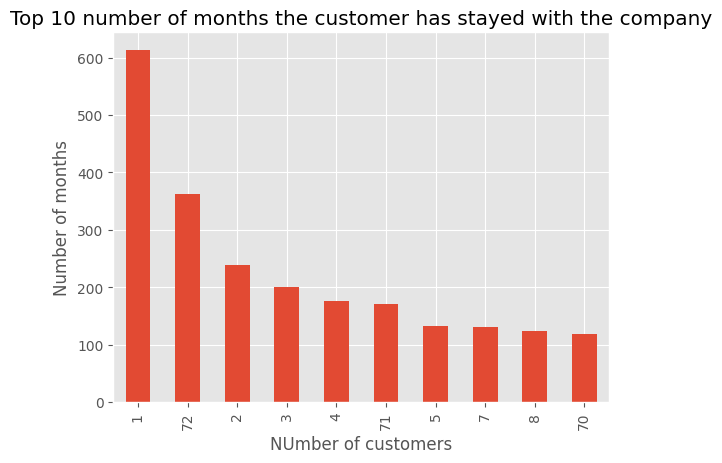

In [99]:
ax = df['Tenure'].value_counts().head(10)\
.plot(kind='bar', title='Top 10 number of months the customer has stayed with the company')
ax.set(xlabel='NUmber of customers', ylabel='Number of months')
plt.show()

<Axes: ylabel='Density'>

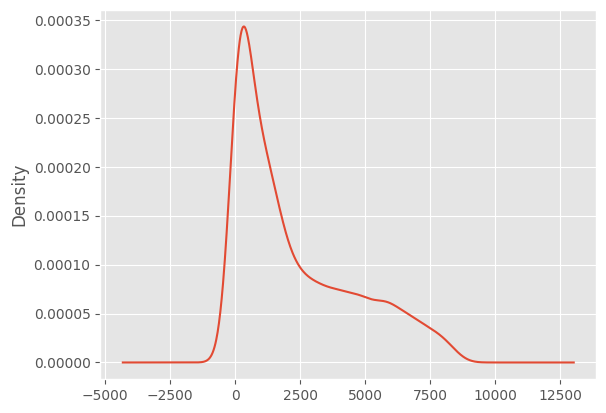

In [100]:
df['TotalCharges'].plot(kind='kde')

Feature Relationships

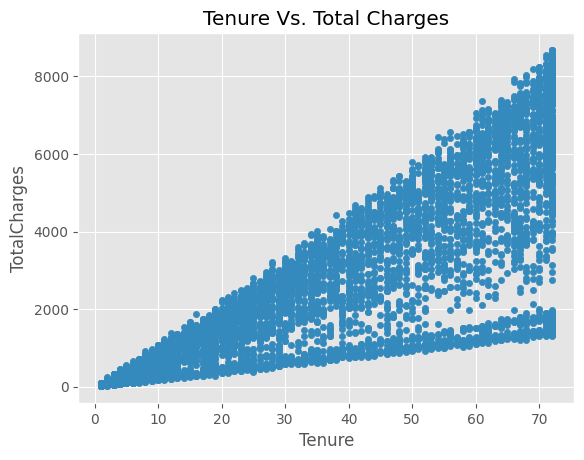

In [101]:
df.plot(kind='scatter', x='Tenure', y='TotalCharges', title='Tenure Vs. Total Charges')
plt.show()

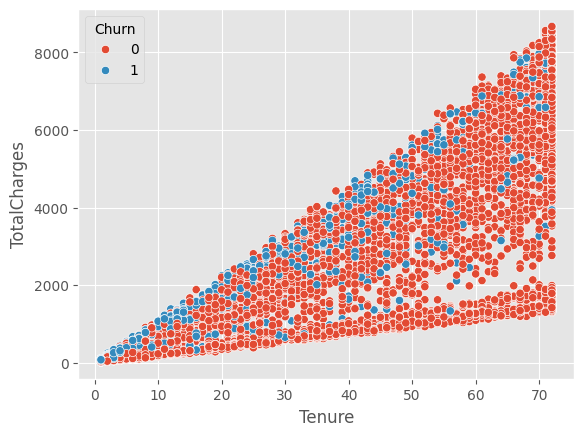

In [102]:
sns.scatterplot(x='Tenure', y='TotalCharges', data= df, hue='Churn')
plt.show()

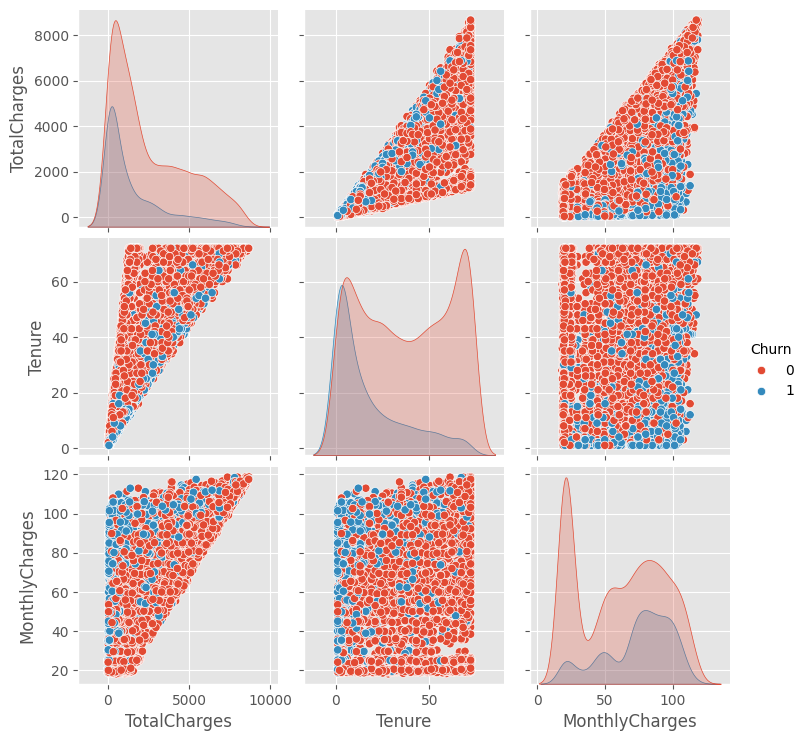

In [103]:
sns.pairplot(df, vars= ['TotalCharges','Tenure','MonthlyCharges'], hue='Churn')
plt.show()

In [104]:
df[['TotalCharges','Tenure','MonthlyCharges']].corr()

,TotalCharges,Tenure,MonthlyCharges
TotalCharges,1.000000,0.825880,0.651065
Tenure,0.825880,1.000000,0.246862
MonthlyCharges,0.651065,0.246862,1.000000


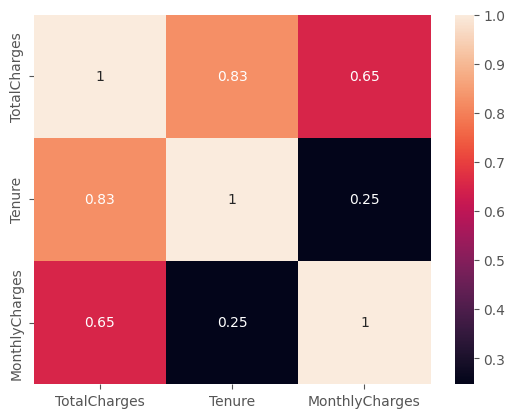

In [105]:
sns.heatmap(df[['TotalCharges','Tenure','MonthlyCharges']].corr(), annot=True)
plt.show()

In [106]:
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


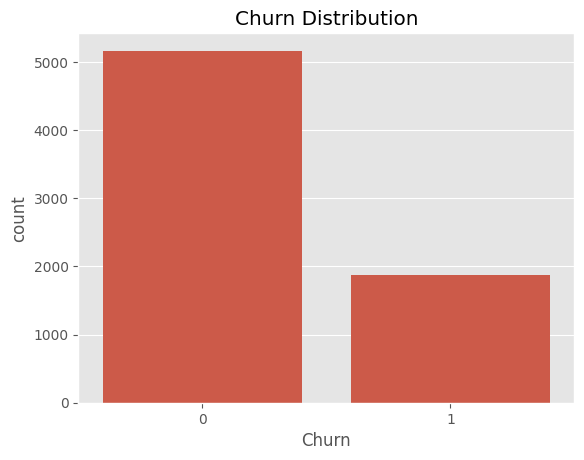

In [107]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

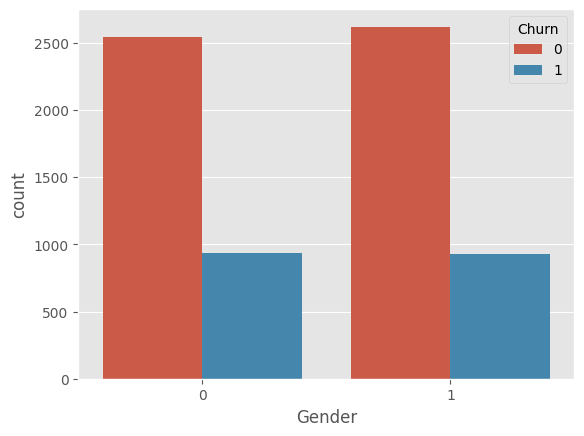

In [108]:
sns.countplot(data=df, x='Gender', hue='Churn')

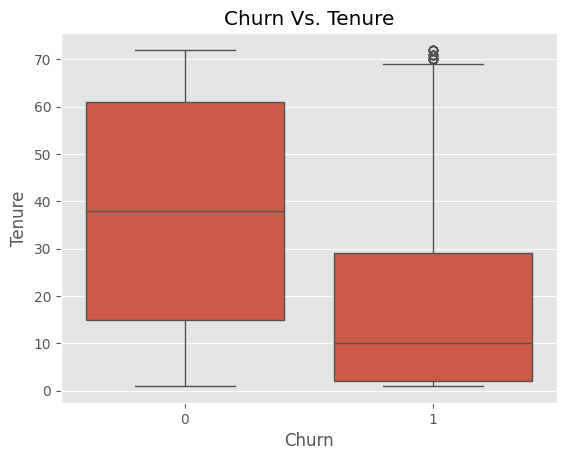

In [109]:
sns.boxplot(data=df, x='Churn', y='Tenure')
plt.title("Churn Vs. Tenure")
plt.show()

Customers with low tenure are likely to churn.

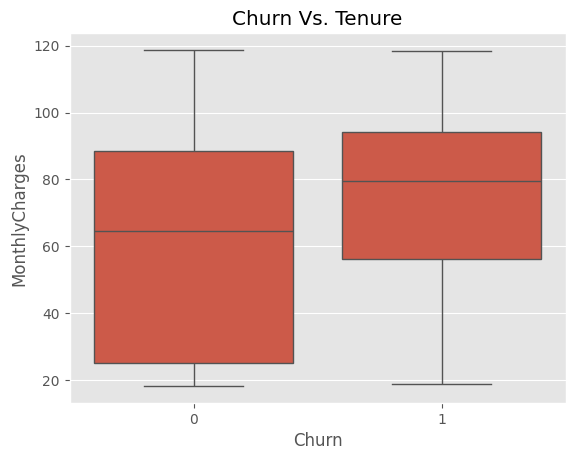

In [110]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Churn Vs. Tenure")
plt.show()

Cutomers with higher monthly chargers are likely to churn

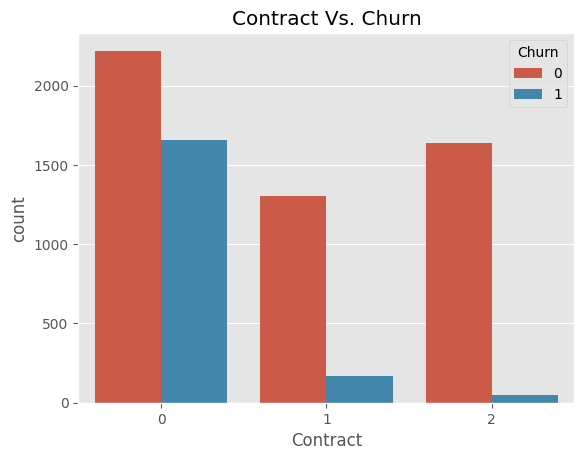

In [111]:
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Vs. Churn")
plt.show()

Customers with month-to-month contratcs are more likely to churn

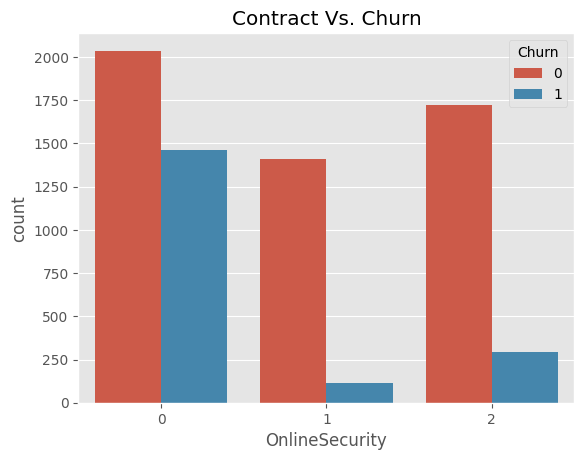

In [112]:
sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title("Contract Vs. Churn")
plt.show()

CUtmoers without online security are the most likely to churn

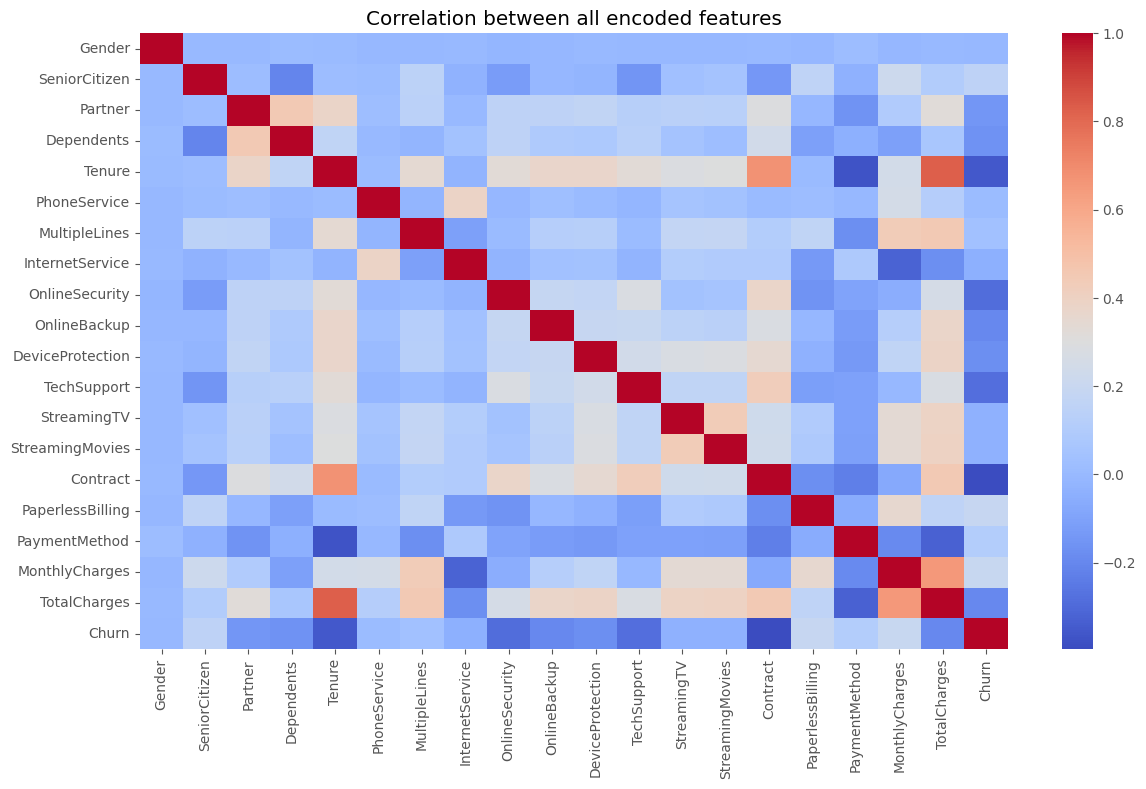

In [115]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation between all encoded features')
plt.show()

#Modelling
splitting into train and test data

For ANN

In [116]:
from os import XATTR_CREATE
from sklearn.model_selection import train_test_split

x = df.drop(['Churn'], axis=1)
y = df['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5625, 19), (1407, 19), (5625,), (1407,))

Diving into layers

In [117]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models

#3 layer neural network
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],))) #hidden layer 1
model.add(layers.Dense(16, activation='relu')) #hidden layer 2
model.add(layers.Dense(1, activation='sigmoid')) #output layer(churn probability)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#testing accuracy while training

In [119]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5496 - loss: 54.8194 - val_accuracy: 0.7404 - val_loss: 0.8016
Epoch 2/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7103 - loss: 0.7891 - val_accuracy: 0.7520 - val_loss: 2.3448
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7466 - loss: 1.0331 - val_accuracy: 0.7129 - val_loss: 0.5405
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7679 - loss: 0.6130 - val_accuracy: 0.7600 - val_loss: 0.4966
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7573 - loss: 0.5808 - val_accuracy: 0.7742 - val_loss: 0.4686
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7615 - loss: 0.5787 - val_accuracy: 0.7831 - val_loss: 0.4694
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7795 - loss: 0.6182 - val_accuracy: 0.6809 - val_loss: 0.5636
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7613 - loss: 0.6767 - val_accuracy: 0

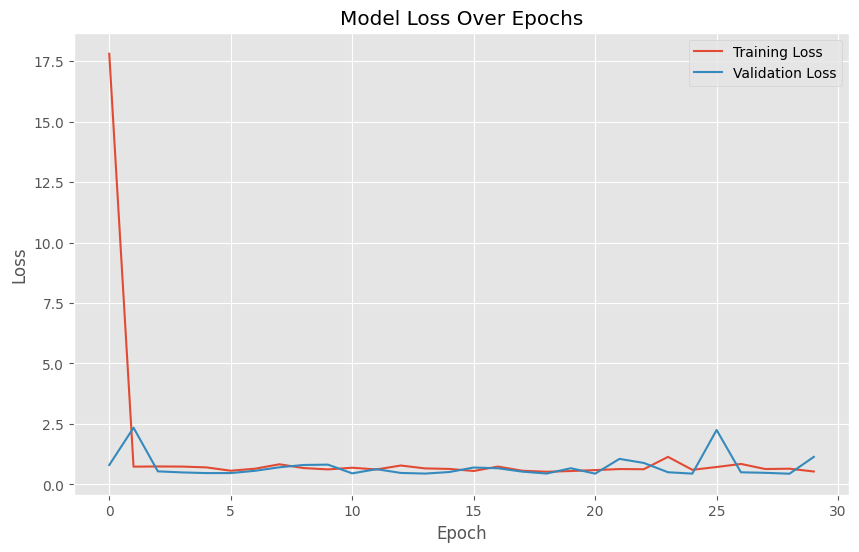

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Predicting if churn or not with ANN

In [121]:
nn_preds= (model.predict(x_test)>0.5).astype(int)
#if its greater than .5 it'll be a churn

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


For Decision tree

In [122]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [123]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3,5,7,10, None], 'min_samples_split': [2,5,10], #testing many version od decision trees(dt)
    'criterion': ['gini', 'entropy']}

#cv=5 for 5 fold cross validation
grid_dt = GridSearchCV(dt, param_grid, cv=5, scoring='f1') #pciks the best based on f1 score
grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_split=5,
                       random_state=42)

In [124]:
dt_preds= best_dt.predict(x_test)
dt_preds

array([0, 1, 0, ..., 0, 0, 0])

###Evaluating and comparing the models

In [125]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluation_table(y_test, preds, model_name):
    data = {
        "Model": [model_name],
        "Accuracy": [accuracy_score(y_test, preds)],
        "Precision": [precision_score(y_test, preds)],
        "Recall": [recall_score(y_test, preds)],
        "F1 Score": [f1_score(y_test, preds)]
    }
    return pd.DataFrame(data)

In [126]:
nn_results =evaluation_table(y_test, nn_preds,'Neural Network')
dt_results = evaluation_table(y_test, dt_preds, 'Decision Tree')

In [127]:
results = pd.concat([nn_results, dt_results], axis=0)
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Neural Network,0.540867,0.353132,0.874332,0.503077
0,Decision Tree,0.765458,0.563953,0.518717,0.540390


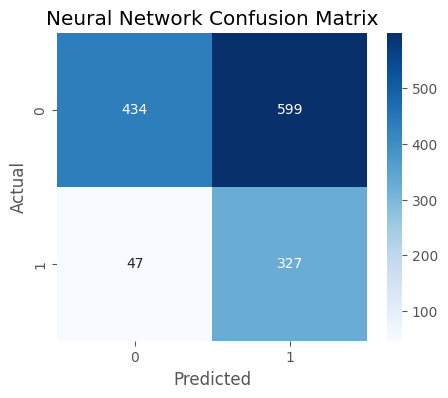

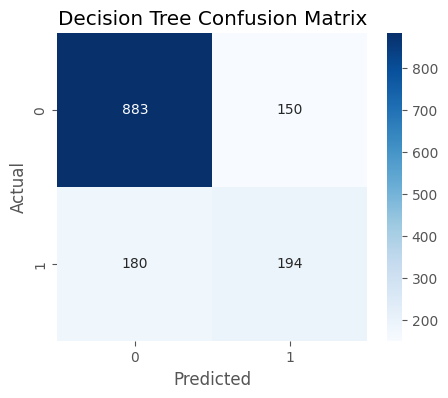

In [128]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_conf_matrix(y_test, nn_preds, "Neural Network Confusion Matrix")
plot_conf_matrix(y_test, dt_preds, "Decision Tree Confusion Matrix")

In [129]:
comparison = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Decision Tree":
     [accuracy_score(y_test, dt_preds),
        precision_score(y_test, dt_preds),
        recall_score(y_test, dt_preds),
        f1_score(y_test, dt_preds)],
    "Neural Network":
     [accuracy_score(y_test, nn_preds),
        precision_score(y_test, nn_preds),
        recall_score(y_test, nn_preds),
        f1_score(y_test, nn_preds)]})

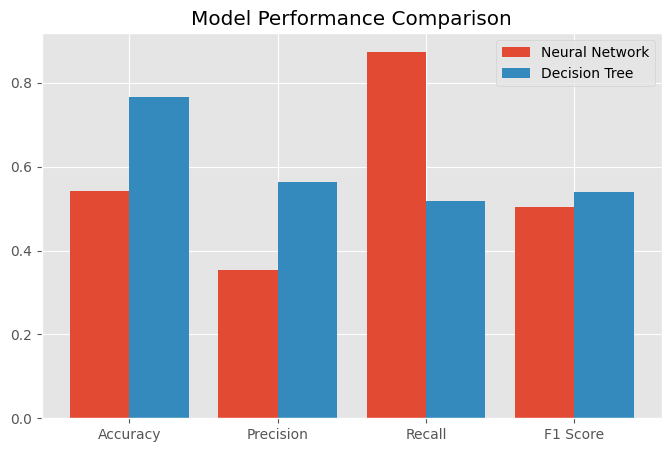

In [130]:
metrics = comparison["Metric"]
nn_scores = comparison["Neural Network"]
dt_scores = comparison["Decision Tree"]


plt.figure(figsize=(8,5))
x = range(len(metrics))
plt.bar(x, nn_scores, width=0.4, label="Neural Network")
plt.bar([p + 0.4 for p in x], dt_scores, width=0.4, label="Decision Tree")
plt.xticks([p + 0.2 for p in x], metrics)
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
